In [1]:
from sklearn import datasets

# How are we going to use evaluate the performance? 
# 1. accuracy
from sklearn import metrics
# 2. f1 score 
from sklearn.metrics import f1_score

# Machine learning models 

# Linear Regression 
# url : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression

# SVM
# url: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn import svm

# KNN 
# url: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier

# Decision Tree
# url: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier

# Random Forest 
# url: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

# Logistic Classifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import learning_curve, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split, KFold
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt

# PCA 
from sklearn.decomposition import PCA 

# Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

# Preprocessing

In [2]:
total_dep_score = pd.read_csv('../data/0&1/total_dep_thoughts.csv')

X_t = total_dep_score.copy()
del X_t['dep_thoughts']

y_t = total_dep_score['dep_thoughts']

In [3]:
y_t.value_counts() 

1.0    1192
0.0      62
Name: dep_thoughts, dtype: int64

In [4]:
1192 / (1192 + 62)

0.9505582137161085

In [5]:
print(X_t)
print(y_t)

      comp_week  comp_wend  text_week  text_wend  tv_week  tv_wend
0             1          2          1          1        1        2
1             2          2          3          3        1        2
2             1          0          1          2        1        1
3             2          3          3          3        2        3
4             2          3          1          1        2        1
...         ...        ...        ...        ...      ...      ...
1249          2          2          2          2        2        1
1250          3          3          1          1        1        2
1251          3          0          2          2        2        2
1252          2          3          1          1        1        2
1253          2          3          1          1        1        2

[1254 rows x 6 columns]
0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1249    1.0
1250    1.0
1251    0.0
1252    1.0
1253    1.0
Name: dep_thoughts, Length: 1254, dtype

In [3]:
sampled_dep_score = pd.read_csv('../data/0&1/sampled_dep_thoughts.csv')

X_s = sampled_dep_score.copy()
del X_s['dep_thoughts']

y_s = sampled_dep_score['dep_thoughts']

In [8]:
y_s.value_counts() 

1.0    62
0.0    62
Name: dep_thoughts, dtype: int64

In [9]:
print(X_s)
print(y_s)

     comp_week  comp_wend  text_week  text_wend  tv_week  tv_wend
0            3          3          2          3        1        2
1            2          3          1          1        1        2
2            2          3          2          1        2        2
3            3          3          1          1        2        1
4            2          2          1          1        1        2
..         ...        ...        ...        ...      ...      ...
119          3          3          2          2        1        1
120          3          0          2          2        2        2
121          3          3          2          2        3        3
122          2          2          3          3        2        2
123          2          3          2          3        3        3

[124 rows x 6 columns]
0      0.0
1      1.0
2      0.0
3      0.0
4      1.0
      ... 
119    1.0
120    0.0
121    0.0
122    0.0
123    0.0
Name: dep_thoughts, Length: 124, dtype: float64


In [4]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 1)

# 1. total

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=1)  # 70% training and 30% test

## SVM

In [8]:
svm_hyper_params = [ 
                        {
                        'gamma': np.logspace(-4, -1, 4),
                        'C': np.logspace(-3, 1, 5),
                        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
                        }
                    ]

# specify model
svm_model = svm.SVC(random_state=1)

# set up GridSearchCV()
svm_model_cv = GridSearchCV(estimator = svm_model, 
                            param_grid = svm_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=2)      

In [9]:
# fit the model
svm_model_cv.fit(X_train, y_train)
print("best hyper parameters", svm_model_cv.best_params_)
svm_y_pred = svm_model_cv.predict(X_test)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  74 tasks      | elapsed:    4.8s


best hyper parameters {'C': 0.001, 'gamma': 0.0001, 'kernel': 'linear'}


[Parallel(n_jobs=2)]: Done 400 out of 400 | elapsed:   27.6s finished


In [10]:
# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, svm_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, svm_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, svm_y_pred))

Accuracy: 0.9628647214854111
F1 score macro: 0.4905405405405405
F1 score weighted: 0.9446483618897412


[learning_curve] Training set sizes: [  7  84 161 238 315 392 469 546 623 701]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    0.7s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.7s finished


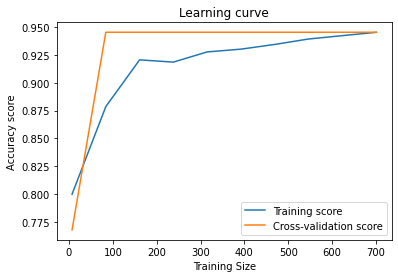

In [6]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = svm.SVC(kernel='linear', C=0.001, gamma=0.0001)

train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)
# 여기만 바꾸면 된다. 


train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, val_mean, label='Cross-validation score')
plt.title('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Logistic Regression

In [11]:
log_hyper_params = [ 
                        {
                        'C': np.logspace(-4, 2, 7),
                        'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                        'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
                        'multi_class' : ['auto', 'ovr', 'multinomial']
                        }
                    ]

# specify model
log_model = LogisticRegression(random_state=1)

# set up GridSearchCV()
log_model_cv = GridSearchCV(estimator = log_model, 
                            param_grid = log_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

In [12]:
# fit the model
log_model_cv.fit(X_train, y_train)
print("best hyper parameters", log_model_cv.best_params_)
log_y_pred = log_model_cv.predict(X_test)

Fitting 5 folds for each of 420 candidates, totalling 2100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 1308 tasks      | elapsed:   20.5s


best hyper parameters {'C': 0.0001, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'saga'}


[Parallel(n_jobs=-1)]: Done 2100 out of 2100 | elapsed:   37.1s finished


In [13]:
# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, log_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, log_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, log_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, log_y_pred))

Accuracy: 0.9628647214854111
F1 score macro: 0.4905405405405405
F1 score weighted: 0.9446483618897412


[learning_curve] Training set sizes: [  7  84 161 238 315 392 469 546 623 701]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished


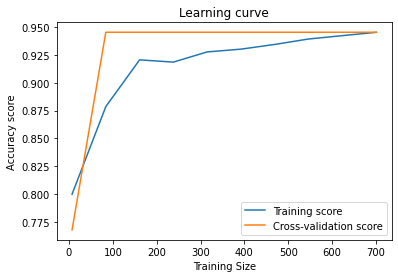

In [7]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = LogisticRegression(C=0.0001, multi_class='auto', penalty='l1', solver='saga')


train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)
# 여기만 바꾸면 된다. 


train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, val_mean, label='Cross-validation score')
plt.title('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## KNN

In [14]:
knn_hyper_params = [ 
                        {
                        'weights' : ['uniform', 'distance'],
                        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                        'leaf_size' : np.linspace(2, 100, 10, dtype=int)
                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
knn_model = KNeighborsClassifier(n_neighbors=len(y_t.unique()))

# set up GridSearchCV()
knn_model_cv = GridSearchCV(estimator = knn_model, 
                            param_grid = knn_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

In [15]:
# fit the model
knn_model_cv.fit(X_train, y_train)
print("best hyper parameters", knn_model_cv.best_params_)
knn_y_pred = knn_model_cv.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:   17.1s


best hyper parameters {'algorithm': 'auto', 'leaf_size': 45, 'weights': 'distance'}


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   22.0s finished


In [16]:
# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, knn_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, knn_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, knn_y_pred))

Accuracy: 0.8169761273209549
F1 score macro: 0.46357206194708517
F1 score weighted: 0.8666374829127079


[learning_curve] Training set sizes: [  7  84 161 238 315 392 469 546 623 701]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished


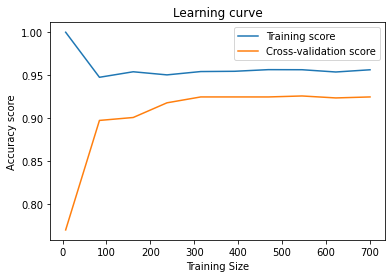

In [9]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = KNeighborsClassifier(algorithm='auto', leaf_size=45, weights='distance')


train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)
# 여기만 바꾸면 된다. 


train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, val_mean, label='Cross-validation score')
plt.title('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Random Forest

In [17]:
rf_hyper_params = [ 
                        {
                            'n_estimators' : [int(x) for x in np.linspace(5, 50, 5)],
                            'criterion' : ['gini', 'entropy'],
                            'max_depth' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_split' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_leaf' : [int(x) for x in np.linspace(2, 50, 5)],
                            'max_features' : ['auto', 'sqrt', 'log2'],
                            'bootstrap' : [True, False]

                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
rf_model = RandomForestClassifier(random_state=1)

# set up GridSearchCV()
rf_model_cv = GridSearchCV(estimator = rf_model, 
                            param_grid = rf_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

In [18]:
# fit the model
rf_model_cv.fit(X_train, y_train)
print("best hyper parameters", rf_model_cv.best_params_)
rf_y_pred = rf_model_cv.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 7500 candidates, totalling 37500 fits


[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 222 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done 425 tasks      | elapsed:   42.2s
[Parallel(n_jobs=-1)]: Done 708 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1073 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1518 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 2045 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 2652 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 3341 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 4110 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 4961 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 5892 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 6905 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 7998 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 9173 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 10428 tasks      | elapsed: 15.

best hyper parameters {'bootstrap': True, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 5}


In [19]:
# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, rf_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, rf_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, rf_y_pred))

Accuracy: 0.9628647214854111
F1 score macro: 0.4905405405405405
F1 score weighted: 0.9446483618897412


[learning_curve] Training set sizes: [  7  84 161 238 315 392 469 546 623 701]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.2s finished


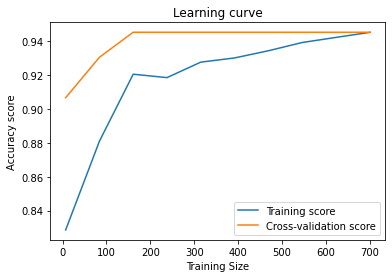

In [10]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=2, max_features='auto', min_samples_leaf=2, min_samples_split=2, n_estimators=5)

train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)
# 여기만 바꾸면 된다. 


train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, val_mean, label='Cross-validation score')
plt.title('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

# Total Learning Curve

In [ ]:
# SVM
plot_model = svm.SVC(kernel='linear', C=0.001, gamma=0.0001)


train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

ax1.plot(train_sizes, train_mean, label='Training Accuracy')
ax1.plot(train_sizes, val_mean, label='Validation Accuracy')
ax1.set_title('SVM Learning curve')
ax1.set_xlabel('Training Size')
ax1.set_ylabel('Accuracy')

# Logistic Regression
plot_model = LogisticRegression(C=0.0001, multi_class='auto', penalty='l1', solver='saga')


train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

ax2.plot(train_sizes, train_mean, label='Training Accuracy')
ax2.plot(train_sizes, val_mean, label='Validation Accuracy')
ax2.set_title('Logistic Regression Learning curve')
ax2.set_xlabel('Training Size')
ax2.set_ylabel('Accuracy')


# KNN
plot_model = KNeighborsClassifier(algorithm='auto', leaf_size=45, weights='distance')


train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

ax3.plot(train_sizes, train_mean, label='Training Accuracy')
ax3.plot(train_sizes, val_mean, label='Validation Accuracy')
ax3.set_title('KNN Learning curve')
ax3.set_xlabel('Training Size')
ax3.set_ylabel('Accuracy')

# Random Forest
plot_model = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=2, max_features='auto', min_samples_leaf=2, min_samples_split=2, n_estimators=5)

train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

ax4.plot(train_sizes, train_mean, label='Training Accuracy')
ax4.plot(train_sizes, val_mean, label='Validation Accuracy')
ax4.set_title('Random Forest Learning curve')
ax4.set_xlabel('Training Size')
ax4.set_ylabel('Accuracy')
ax4.legend(loc='upper center', bbox_to_anchor=(-1.3, -0.1),
          fancybox=True, shadow=True, ncol=2)

# 2. sampled

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=1)  # 70% training and 30% test

# SVM 

In [21]:
svm_hyper_params = [ 
                        {
                        'gamma': np.logspace(-4, -1, 4),
                        'C': np.logspace(-3, 1, 5),
                        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
                        }
                    ]

# specify model
svm_model = svm.SVC(random_state=1)

# set up GridSearchCV()
svm_model_cv = GridSearchCV(estimator = svm_model, 
                            param_grid = svm_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=2)      

In [22]:
# fit the model
svm_model_cv.fit(X_train, y_train)
print("best hyper parameters", svm_model_cv.best_params_)
svm_y_pred = svm_model_cv.predict(X_test)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  74 tasks      | elapsed:    4.5s


best hyper parameters {'C': 10.0, 'gamma': 0.01, 'kernel': 'rbf'}


[Parallel(n_jobs=2)]: Done 400 out of 400 | elapsed:   11.5s finished


In [23]:
# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, svm_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, svm_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, svm_y_pred))

Accuracy: 0.5526315789473685
F1 score macro: 0.5447498238195913
F1 score weighted: 0.5352917176662587


[learning_curve] Training set sizes: [  7  84 161 238 315 392 469 546 623 701]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished


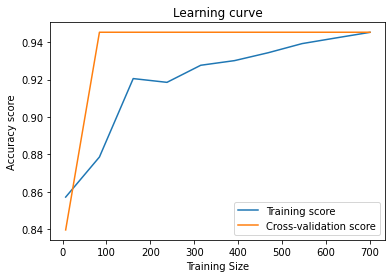

In [11]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = svm.SVC(kernel='rbf', C=10.0, gamma=0.01)


train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)
# 여기만 바꾸면 된다. 


train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, val_mean, label='Cross-validation score')
plt.title('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

# Logistic Regression

In [24]:
log_hyper_params = [ 
                        {
                        'C': np.logspace(-4, 2, 7),
                        'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                        'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
                        'multi_class' : ['auto', 'ovr', 'multinomial']
                        }
                    ]

# specify model
log_model = LogisticRegression(random_state=1)

# set up GridSearchCV()
log_model_cv = GridSearchCV(estimator = log_model, 
                            param_grid = log_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

In [25]:
# fit the model
log_model_cv.fit(X_train, y_train)
print("best hyper parameters", log_model_cv.best_params_)
log_y_pred = log_model_cv.predict(X_test)

Fitting 5 folds for each of 420 candidates, totalling 2100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 860 tasks      | elapsed:   13.2s


best hyper parameters {'C': 0.1, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'newton-cg'}


[Parallel(n_jobs=-1)]: Done 2100 out of 2100 | elapsed:   30.3s finished


In [26]:
# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, log_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, log_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, log_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, log_y_pred))

Accuracy: 0.5526315789473685
F1 score macro: 0.5498257839721254
F1 score weighted: 0.5442141940216394


[learning_curve] Training set sizes: [  7  84 161 238 315 392 469 546 623 701]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished


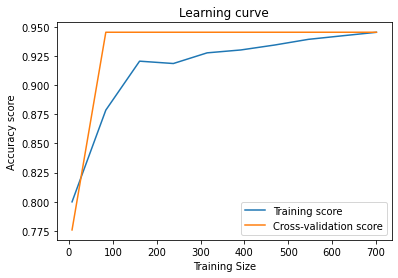

In [12]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = LogisticRegression(C=0.1, multi_class='auto', penalty='l2', solver='newton-cg')


train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)
# 여기만 바꾸면 된다. 


train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, val_mean, label='Cross-validation score')
plt.title('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

# KNN

In [27]:
knn_hyper_params = [ 
                        {
                        'weights' : ['uniform', 'distance'],
                        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                        'leaf_size' : np.linspace(2, 100, 10, dtype=int)
                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
knn_model = KNeighborsClassifier(n_neighbors=len(y_t.unique()))

# set up GridSearchCV()
knn_model_cv = GridSearchCV(estimator = knn_model, 
                            param_grid = knn_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

In [28]:
# fit the model
knn_model_cv.fit(X_train, y_train)
print("best hyper parameters", knn_model_cv.best_params_)
knn_y_pred = knn_model_cv.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    1.8s


best hyper parameters {'algorithm': 'auto', 'leaf_size': 2, 'weights': 'distance'}


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    6.6s finished


In [29]:
# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, knn_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, knn_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, knn_y_pred))

Accuracy: 0.5
F1 score macro: 0.45427059712773993
F1 score weighted: 0.47921390778533635


[learning_curve] Training set sizes: [  7  84 161 238 315 392 469 546 623 701]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.2s finished


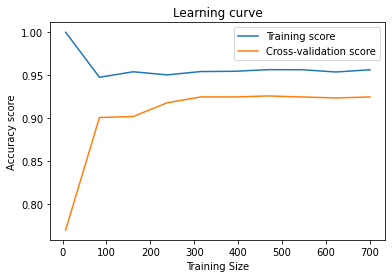

In [13]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = KNeighborsClassifier(algorithm='auto', leaf_size=2, weights='distance')


train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)
# 여기만 바꾸면 된다. 


train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, val_mean, label='Cross-validation score')
plt.title('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

# Random Forest

In [30]:
rf_hyper_params = [ 
                        {
                            'n_estimators' : [int(x) for x in np.linspace(5, 50, 5)],
                            'criterion' : ['gini', 'entropy'],
                            'max_depth' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_split' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_leaf' : [int(x) for x in np.linspace(2, 50, 5)],
                            'max_features' : ['auto', 'sqrt', 'log2'],
                            'bootstrap' : [True, False]

                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
rf_model = RandomForestClassifier(random_state=1)

# set up GridSearchCV()
rf_model_cv = GridSearchCV(estimator = rf_model, 
                            param_grid = rf_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

In [31]:
# fit the model
rf_model_cv.fit(X_train, y_train)
print("best hyper parameters", rf_model_cv.best_params_)
rf_y_pred = rf_model_cv.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 7500 candidates, totalling 37500 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   30.9s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   55.6s
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 5824 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 6837 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 7930 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 9105 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 10360 tasks      | elapsed: 15.

best hyper parameters {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 14, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 14, 'n_estimators': 5}


In [32]:
# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, rf_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, rf_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, rf_y_pred))

Accuracy: 0.5789473684210527
F1 score macro: 0.5789473684210527
F1 score weighted: 0.5789473684210527


[learning_curve] Training set sizes: [  7  84 161 238 315 392 469 546 623 701]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished


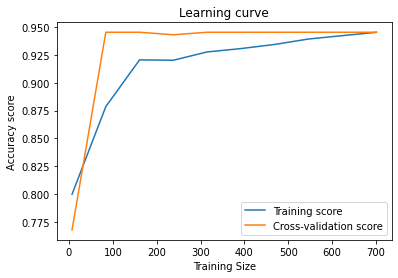

In [14]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = RandomForestClassifier(bootstrap=True, criterion='entropy', max_depth=14, max_features='auto', min_samples_leaf=2, min_samples_split=14, n_estimators=5)

train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)
# 여기만 바꾸면 된다. 


train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, val_mean, label='Cross-validation score')
plt.title('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

# Sampled Learning Curve

In [ ]:
# SVM
plot_model = svm.SVC(kernel='rbf', C=10.0, gamma=0.01)

train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

ax1.plot(train_sizes, train_mean, label='Training Accuracy')
ax1.plot(train_sizes, val_mean, label='Validation Accuracy')
ax1.set_title('SVM Learning curve')
ax1.set_xlabel('Training Size')
ax1.set_ylabel('Accuracy')

# Logistic Regression
plot_model = LogisticRegression(C=0.1, multi_class='auto', penalty='l2', solver='newton-cg')


train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

ax2.plot(train_sizes, train_mean, label='Training Accuracy')
ax2.plot(train_sizes, val_mean, label='Validation Accuracy')
ax2.set_title('Logistic Regression Learning curve')
ax2.set_xlabel('Training Size')
ax2.set_ylabel('Accuracy')


# KNN
plot_model = KNeighborsClassifier(algorithm='auto', leaf_size=2, weights='distance')


train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

ax3.plot(train_sizes, train_mean, label='Training Accuracy')
ax3.plot(train_sizes, val_mean, label='Validation Accuracy')
ax3.set_title('KNN Learning curve')
ax3.set_xlabel('Training Size')
ax3.set_ylabel('Accuracy')

# Random Forest
plot_model = RandomForestClassifier(bootstrap=True, criterion='entropy', max_depth=14, max_features='auto', min_samples_leaf=2, min_samples_split=14, n_estimators=5)

train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

ax4.plot(train_sizes, train_mean, label='Training Accuracy')
ax4.plot(train_sizes, val_mean, label='Validation Accuracy')
ax4.set_title('Random Forest Learning curve')
ax4.set_xlabel('Training Size')
ax4.set_ylabel('Accuracy')
ax4.legend(loc='upper center', bbox_to_anchor=(-1.3, -0.1),
          fancybox=True, shadow=True, ncol=2)